In [1]:
from tools import pfile
import numpy as np
import matplotlib.pyplot as plt
import os.path
import sys

In [2]:
n_dimensions = 3
context_frame_size = 19
context_padding = (context_frame_size-1)//2
for file in ['workdir/train_va_MFCC_0_D_A_norm.pfile', 'workdir/train_tr_MFCC_0_D_A_norm.pfile','workdir/test_MFCC_0_D_A_norm.pfile']:
    if not os.path.isfile(file):
        print('File: {} is missing. Terminating.'.format(file))
        break
        
    p_data = pfile.pfile_read(file)
    print('Loaded')
    
    n_datapoints = len(p_data[0])
    
    n_features = len(p_data[2][0])
    assert n_features%3 == 0, 'The feature vector should be divideable by three, but is {}'.format(n_features)
    context_hight = n_features//n_dimensions
    
    X = np.zeros([context_frame_size, n_dimensions, context_hight, n_datapoints])
    Y = np.zeros([n_datapoints,])
    
    padding = np.zeros([context_padding, n_dimensions, context_hight])
    in_data = np.reshape(p_data[2], [n_datapoints, n_dimensions, context_hight])
    in_data = np.concatenate([padding, in_data, padding])
    print('Computing matrix for: {}'.format(file))
    print('X_shape', X.shape)
    print('inp_shape', in_data.shape)
    for i in range(n_datapoints):
        
        start = i
        end = i + context_frame_size 
        X[:, :, :, i] = in_data[start:end, :, :] 
        Y[i] = p_data[3][i] 
        
    print('Computed')
    data_save_file_name = '{}_data_context_{}.npy'.format(file.split('.')[0], str(context_frame_size))
    labels_save_file_name = '{}_labels_context_{}.npy'.format(file.split('.')[0], str(context_frame_size))
    
    
    print('Saving matrix for: {}, to {}'.format(file, data_save_file_name))
    np.save(data_save_file_name, X)
    np.save(labels_save_file_name, Y)
    

<class 'bytes'>
Loaded
Computing matrix for: workdir/train_va_MFCC_0_D_A_norm.pfile
X_shape (19, 3, 13, 147731)
inp_shape (147749, 3, 13)
Computed
Saving matrix for: workdir/train_va_MFCC_0_D_A_norm.pfile, to workdir/train_va_MFCC_0_D_A_norm_data_context_19.npy
<class 'bytes'>
Loaded
Computing matrix for: workdir/train_tr_MFCC_0_D_A_norm.pfile
X_shape (19, 3, 13, 1359661)
inp_shape (1359679, 3, 13)
Computed
Saving matrix for: workdir/train_tr_MFCC_0_D_A_norm.pfile, to workdir/train_tr_MFCC_0_D_A_norm_data_context_19.npy
<class 'bytes'>
Loaded
Computing matrix for: workdir/test_MFCC_0_D_A_norm.pfile
X_shape (19, 3, 13, 1527014)
inp_shape (1527032, 3, 13)
Computed
Saving matrix for: workdir/test_MFCC_0_D_A_norm.pfile, to workdir/test_MFCC_0_D_A_norm_data_context_19.npy


In [4]:
# Test the data
# These plots should look the same

data = np.load('workdir/train_va_MFCC_0_D_A_norm_data_context_{}.npy'.format(str(context_frame_size)))
p_data = pfile.pfile_read('workdir/train_va_MFCC_0_D_A_norm.pfile')

<class 'bytes'>


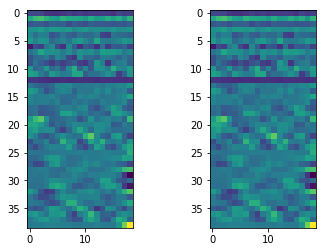

In [6]:

plt.subplot(1,2,1)
plt.imshow(p_data[2][0:context_frame_size,:].T)
plt.subplot(1,2,2)
plt.imshow(np.concatenate([data[:,0,:,context_padding].T, data[:,1,:,context_padding].T, data[:,2,:,context_padding].T]))
plt.show()

In [7]:
plt.show()

In [8]:
p_data[0][:218]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [9]:
a = np.array(list(range(33)))

In [10]:
b = np.array([a, a, a, a, a+100, a+100, a+100, a+100, a+200,a+200,a+200,a+200]).T
c =  np.concatenate([b, b+33, b+66,b+99 ,b+132, b+165])


In [11]:
c.shape

(198, 12)

In [12]:
d = np.reshape(c[:, :], [198, 3, 4])
d[:12, 0, :]

array([[ 0,  0,  0,  0],
       [ 1,  1,  1,  1],
       [ 2,  2,  2,  2],
       [ 3,  3,  3,  3],
       [ 4,  4,  4,  4],
       [ 5,  5,  5,  5],
       [ 6,  6,  6,  6],
       [ 7,  7,  7,  7],
       [ 8,  8,  8,  8],
       [ 9,  9,  9,  9],
       [10, 10, 10, 10],
       [11, 11, 11, 11]])

In [13]:
p_data[2].shape

(147731, 39)